In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score, davies_bouldin_score, silhouette_samples
%matplotlib inline
warnings.filterwarnings("ignore")

In [47]:
df = pd.read_csv('BPI2016_Complaints.csv', sep=';', encoding='latin-1')
df

,CustomerID,AgeCategory,Gender,Office_U,Office_W,ComplaintDossierID,ComplaintID,ContactDate,ContactChannelID,ComplaintThemeID,ComplaintSubthemeID,ComplaintTopicID,ComplaintTheme,ComplaintSubtheme,ComplaintTopic,ComplaintTheme_EN,ComplaintSubtheme_EN,ComplaintTopic_EN
0,1945807,50-65,M,230,233,197,220,2016-01-12,8,1,5,1,behandelingsduur,n.v.t.,(herzienings)besluit wordt niet / te laat genomen,duration of treatment,N.A.,(Revision) Decision not/too late taken
1,733565,30-39,M,296,290,198,221,2016-01-12,8,1,5,1,behandelingsduur,n.v.t.,(herzienings)besluit wordt niet / te laat genomen,duration of treatment,N.A.,(Revision) Decision not/too late taken
2,413563,18-29,V,327,327,225,255,2016-02-01,8,3,4,2,dienstverlening,informatie / communicatie naar de klant,"(meerdere) verzoeken, te weinig resultaat",services,information/communication to the customer,"(Multiple) requests, to little avail"
3,2027840,30-39,M,327,321,149,165,2015-12-11,5,3,4,2,dienstverlening,informatie / communicatie naar de klant,"(meerdere) verzoeken, te weinig resultaat",services,information/communication to the customer,"(Multiple) requests, to little avail"
4,1202227,30-39,V,280,283,3,6,2015-07-07,5,3,4,2,dienstverlening,informatie / communicatie naar de klant,"(meerdere) verzoeken, te weinig resultaat",services,information/communication to the customer,"(Multiple) requests, to little avail"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,1373382,30-39,V,257,261,88,102,2015-11-05,8,3,2,68,dienstverlening,bereikbaarheid / toegankelijkheid,wijzigingsformulier niet bereikbaar,services,availability/accessibility,change form unreachable
285,1604792,50-65,V,257,291,72,85,2015-10-16,8,3,3,69,dienstverlening,betaling,"wijzigingsformulier niet verwerkt, betaling on...",services,payment,"change form is not processed, incorrect payment"
286,1774398,50-65,M,305,304,179,198,2016-01-05,8,3,3,69,dienstverlening,betaling,"wijzigingsformulier niet verwerkt, betaling on...",services,payment,"change form is not processed, incorrect payment"
287,1840727,30-39,M,296,291,183,202,2016-01-06,8,3,3,69,dienstverlening,betaling,"wijzigingsformulier niet verwerkt, betaling on...",services,payment,"change form is not processed, incorrect payment"


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CustomerID            289 non-null    int64 
 1   AgeCategory           289 non-null    object
 2   Gender                289 non-null    object
 3   Office_U              289 non-null    int64 
 4   Office_W              289 non-null    int64 
 5   ComplaintDossierID    289 non-null    int64 
 6   ComplaintID           289 non-null    int64 
 7   ContactDate           289 non-null    object
 8   ContactChannelID      289 non-null    int64 
 9   ComplaintThemeID      289 non-null    int64 
 10  ComplaintSubthemeID   289 non-null    int64 
 11  ComplaintTopicID      289 non-null    int64 
 12  ComplaintTheme        289 non-null    object
 13  ComplaintSubtheme     289 non-null    object
 14  ComplaintTopic        289 non-null    object
 15  ComplaintTheme_EN     289 non-null    ob

In [49]:

df = df.drop(columns=['Office_U', 'Office_W', 'ComplaintDossierID', 'ComplaintID', 'ContactChannelID', 'ComplaintThemeID', 'ComplaintSubthemeID',	'ComplaintTopicID',	'ComplaintTheme', 'ComplaintSubtheme',	'ComplaintTopic', 'ComplaintTheme_EN',	'ComplaintSubtheme_EN'])
df.head(20)

,CustomerID,AgeCategory,Gender,ContactDate,ComplaintTopic_EN
0,1945807,50-65,M,2016-01-12,(Revision) Decision not/too late taken
1,733565,30-39,M,2016-01-12,(Revision) Decision not/too late taken
2,413563,18-29,V,2016-02-01,"(Multiple) requests, to little avail"
3,2027840,30-39,M,2015-12-11,"(Multiple) requests, to little avail"
4,1202227,30-39,V,2015-07-07,"(Multiple) requests, to little avail"
5,2016564,40-49,V,2015-07-09,"(Multiple) requests, to little avail"
6,2060596,50-65,M,2015-08-18,"(Multiple) requests, to little avail"
7,2024035,30-39,V,2015-10-06,"(Multiple) requests, to little avail"
8,2079086,40-49,M,2015-10-06,"(Multiple) requests, to little avail"
9,2015948,18-29,V,2015-07-28,known data (again) requested


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         289 non-null    int64 
 1   AgeCategory        289 non-null    object
 2   Gender             289 non-null    object
 3   ContactDate        289 non-null    object
 4   ComplaintTopic_EN  289 non-null    object
dtypes: int64(1), object(4)
memory usage: 11.4+ KB


In [51]:
dfcopy = df.copy()

In [52]:
number = LabelEncoder()
dfcopy["CustomerID"] = number.fit_transform(dfcopy["CustomerID"].astype('str'))
dfcopy["CustomerID"].value_counts()

CustomerID
14     5
43     4
25     4
90     4
123    4
      ..
83     1
79     1
35     1
94     1
121    1
Name: count, Length: 226, dtype: int64

In [53]:
dfcopy["AgeCategory"] = number.fit_transform(dfcopy["AgeCategory"].astype('str'))
dfcopy["AgeCategory"].value_counts()

AgeCategory
3    98
1    85
2    60
0    46
Name: count, dtype: int64

In [54]:
dfcopy["Gender"] = number.fit_transform(dfcopy["Gender"].astype('str'))
dfcopy["Gender"].value_counts()

Gender
1    161
0    128
Name: count, dtype: int64

In [55]:
dfcopy["ComplaintTopic_EN"] = number.fit_transform(dfcopy["ComplaintTopic_EN"].astype('str'))
dfcopy["ComplaintTopic_EN"].value_counts()

ComplaintTopic_EN
6     34
47    25
38    21
7     20
55    19
      ..
4      1
52     1
41     1
29     1
19     1
Name: count, Length: 70, dtype: int64

In [56]:
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         289 non-null    int32 
 1   AgeCategory        289 non-null    int32 
 2   Gender             289 non-null    int32 
 3   ContactDate        289 non-null    object
 4   ComplaintTopic_EN  289 non-null    int32 
dtypes: int32(4), object(1)
memory usage: 6.9+ KB


In [57]:
dfcopy.head()

,CustomerID,AgeCategory,Gender,ContactDate,ComplaintTopic_EN
0,75,3,0,2016-01-12,1
1,207,1,0,2016-01-12,1
2,186,0,1,2016-02-01,0
3,101,1,0,2015-12-11,0
4,14,1,1,2015-07-07,0


In [58]:
dfcopy.CustomerID = pd.to_numeric(dfcopy.CustomerID)
dfcopy.AgeCategory = pd.to_numeric(dfcopy.AgeCategory)
dfcopy.Gender = pd.to_numeric(dfcopy.Gender)
dfcopy.ComplaintTopic_EN = pd.to_numeric(dfcopy.ComplaintTopic_EN)

In [59]:
dfcopy = dfcopy.drop(columns=["ContactDate"])
dfcopy.head()

,CustomerID,AgeCategory,Gender,ComplaintTopic_EN
0,75,3,0,1
1,207,1,0,1
2,186,0,1,0
3,101,1,0,0
4,14,1,1,0


In [60]:
cols = dfcopy.columns

In [61]:
ms = MinMaxScaler()
dfcopy = ms.fit_transform(dfcopy)
dfcopy = pd.DataFrame(dfcopy, columns=[cols])
dfcopy.head(5)

,CustomerID,AgeCategory,Gender,ComplaintTopic_EN
0,0.333333,1.000000,0.0,0.014493
1,0.920000,0.333333,0.0,0.014493
2,0.826667,0.000000,1.0,0.000000
3,0.448889,0.333333,0.0,0.000000
4,0.062222,0.333333,1.0,0.000000


In [62]:
# Melakukan PCA dengan 2 komponen
pca = PCA(n_components=2)
pca.fit(dfcopy)
x_pca = pca.transform(dfcopy)

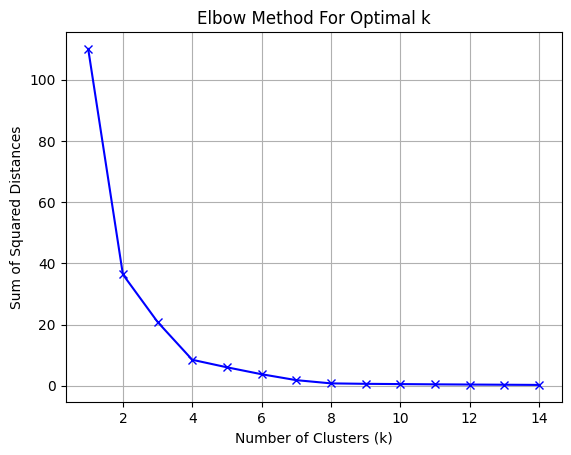

In [63]:
# Menentukan jumlah cluster optimal dengan metode Elbow
Sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km = km.fit(x_pca)
    Sum_of_squared_distances.append(km.inertia_)
# Visualisasi plot
plt.figure()
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

For k=3: Silhouette Score = 0.64, Davies-Bouldin Index = 0.51
For k=4: Silhouette Score = 0.67, Davies-Bouldin Index = 0.49


For k=6: Silhouette Score = 0.68, Davies-Bouldin Index = 0.42
For k=8: Silhouette Score = 0.80, Davies-Bouldin Index = 0.29
For k=9: Silhouette Score = 0.77, Davies-Bouldin Index = 0.32


Text(0, 0.5, 'Davies-Bouldin Index')

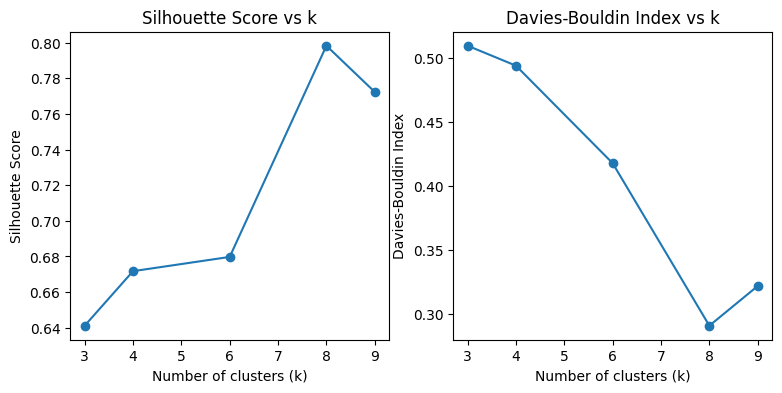

In [64]:
k_candidates = [3, 4, 6, 8, 9]
results = {}

for k in k_candidates:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=111)
    y_kmeans = kmeans.fit_predict(x_pca)
    
    silhouette_avg = silhouette_score(x_pca, y_kmeans)
    db_index = davies_bouldin_score(x_pca, y_kmeans)
    
    
    results[k] = {'Silhouette Score': silhouette_avg, 'Davies-Bouldin Index': db_index}
    print(f'For k={k}: Silhouette Score = {silhouette_avg:.2f}, Davies-Bouldin Index = {db_index:.2f}')

# Extracting scores for plotting
k_values = list(results.keys())
silhouette_scores = [results[k]['Silhouette Score'] for k in k_values]
db_indices = [results[k]['Davies-Bouldin Index'] for k in k_values]

# Plotting Silhouette Score
plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')

# Plotting Davies-Bouldin Index
plt.subplot(1, 3, 2)
plt.plot(k_values, db_indices, marker='o')
plt.title('Davies-Bouldin Index vs k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Davies-Bouldin Index')

In [65]:
# Pilih k yang optimal berdasarkan evaluasi metrik
optimal_k = max(results, key=lambda k: (results[k]['Silhouette Score'], -results[k]['Davies-Bouldin Index']))
print(f'Optimal number of clusters: {optimal_k}')

Optimal number of clusters: 8


In [66]:
# Visualisasi cluster dengan jumlah k optimal
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, max_iter=300, random_state=111)
y_kmeans = kmeans.fit_predict(x_pca)

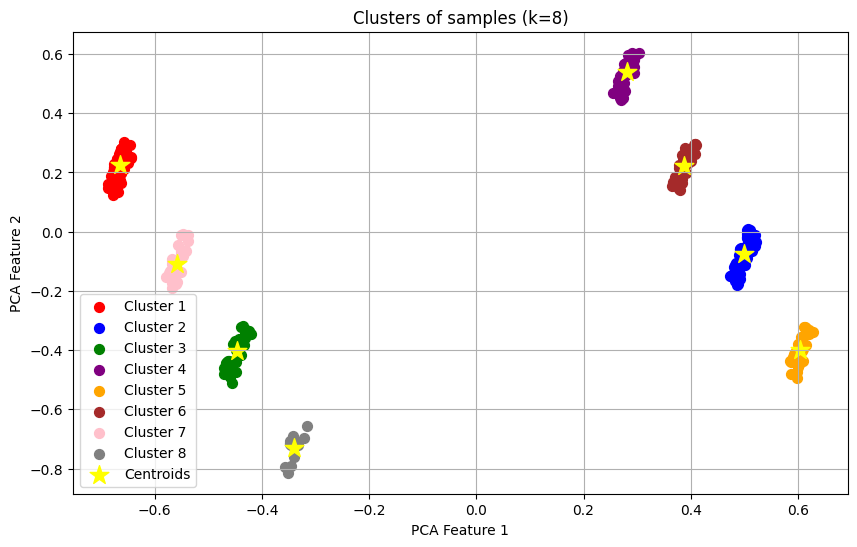

In [67]:
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray']
for i in range(optimal_k):
    plt.scatter(x_pca[y_kmeans == i, 0], x_pca[y_kmeans == i, 1], s=50, c=colors[i], label=f'Cluster {i+1}')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=200, c='yellow', label='Centroids', marker='*')

plt.title(f'Clusters of samples (k={optimal_k})')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [68]:
df['Cluster'] = y_kmeans
cluster_1 = df[df['Cluster'] == 0]
cluster_2 = df[df['Cluster'] == 1]
cluster_3 = df[df['Cluster'] == 2]
cluster_4 = df[df['Cluster'] == 3]
cluster_5 = df[df['Cluster'] == 4]
cluster_6 = df[df['Cluster'] == 5]
cluster_7 = df[df['Cluster'] == 6]
cluster_8 = df[df['Cluster'] == 7]
df

,CustomerID,AgeCategory,Gender,ContactDate,ComplaintTopic_EN,Cluster
0,1945807,50-65,M,2016-01-12,(Revision) Decision not/too late taken,0
1,733565,30-39,M,2016-01-12,(Revision) Decision not/too late taken,2
2,413563,18-29,V,2016-02-01,"(Multiple) requests, to little avail",4
3,2027840,30-39,M,2015-12-11,"(Multiple) requests, to little avail",2
4,1202227,30-39,V,2015-07-07,"(Multiple) requests, to little avail",1
...,...,...,...,...,...,...
284,1373382,30-39,V,2015-11-05,change form unreachable,1
285,1604792,50-65,V,2015-10-16,"change form is not processed, incorrect payment",3
286,1774398,50-65,M,2016-01-05,"change form is not processed, incorrect payment",0
287,1840727,30-39,M,2016-01-06,"change form is not processed, incorrect payment",2


In [69]:
# # Membuat objek ExcelWriter
# with pd.ExcelWriter('clusters.xlsx') as writer:
#     # Menyimpan setiap cluster ke dalam sheet yang berbeda
#     cluster_1.to_excel(writer, sheet_name='Cluster0', index=False)
#     cluster_2.to_excel(writer, sheet_name='Cluster1', index=False)
#     cluster_3.to_excel(writer, sheet_name='Cluster2', index=False)
#     cluster_4.to_excel(writer, sheet_name='Cluster3', index=False)
#     cluster_5.to_excel(writer, sheet_name='Cluster4', index=False)
#     cluster_6.to_excel(writer, sheet_name='Cluster5', index=False)
#     cluster_7.to_excel(writer, sheet_name='Cluster6', index=False)
#     cluster_8.to_excel(writer, sheet_name='Cluster7', index=False)
    
# # Setelah menulis semua ke dalam file Excel, kita konversi ke CSV
# with pd.ExcelFile('clusters.xlsx') as xls:
#     for sheet_name in xls.sheet_names:
#         df = pd.read_excel(xls, sheet_name)
#         df.to_csv(f"{sheet_name}.csv", index=False)

In [70]:
# df.to_excel('eventlog-clustered.xlsx')